<h1>An analysis of todays Arabica Coffee Beans</h1>
<h3>Created by Nithin Richard</h3>
<h3>CMSC320 Final Project</h3>


<h4>Table of Contents</h4>
<li>Introduction</li>
<li>Initial Data</li>
<li>Chosen Variables</li>
<li>Data given by the Total Cup Points</li>
<li>How Altitude Affects the beans</li>
<li>Linear Regression with the Mean Altitude x Total Cup Points Data</li>
<li>How the Altitude ties in with Global Warming</li>
<li>Conclusion</li>

<h5>An Introduction into the Background of Crop Disease</h5>

With many ecological problems in the world such as Climate Change, Deforestation, and Pollution (To name a few), many individuals are not aware of some of the growing issues facing us such as the increased amount of endangered species of plants with a combination of decreased biodiversity. Or in simpler terms, the plants and crops we are using and consuming are in danger of ceasing to exist. This is due to fungi  that is present and causing a disease that renders the plant and/or crop obsolete. While this has been starting to become well known in society regarding bananas, there is a myriad of other plants suceptible to this danger.

As an introductory crop that many people use but are not aware is affected, coffee beans are in danger of going extinct as the fungus spreads throughout the world. This specific fungus being the Hemileia vastatrix, for which there is no cure (McKirdy 2018). A name for this being coffee rust leaf disease, or simply coffee rust.

At the end of the 19th century, Sri Lanka had been heavily affected by this as their whole coffee industry was wiped out due to coffee rust. While they rebuilt towards a new crop, the damage had been done and they would not be able to return to coffee.

While genetically modified organisims, or GMOs are seemingly the answer to this, this fungi can mutate and evolve essentially creating a never ending battle between man and nature.

Looking at data drawn from the Institute of Coffee Quality's trained reviewers, I will be analyzing the data to see how some of the worlds best Arabica beans may be in danger.  

The Goal of this project is to see if research individuals have done are similar to what trained coffee reviewers have concluded, along with showing how some coffee beans are getting better or worse.

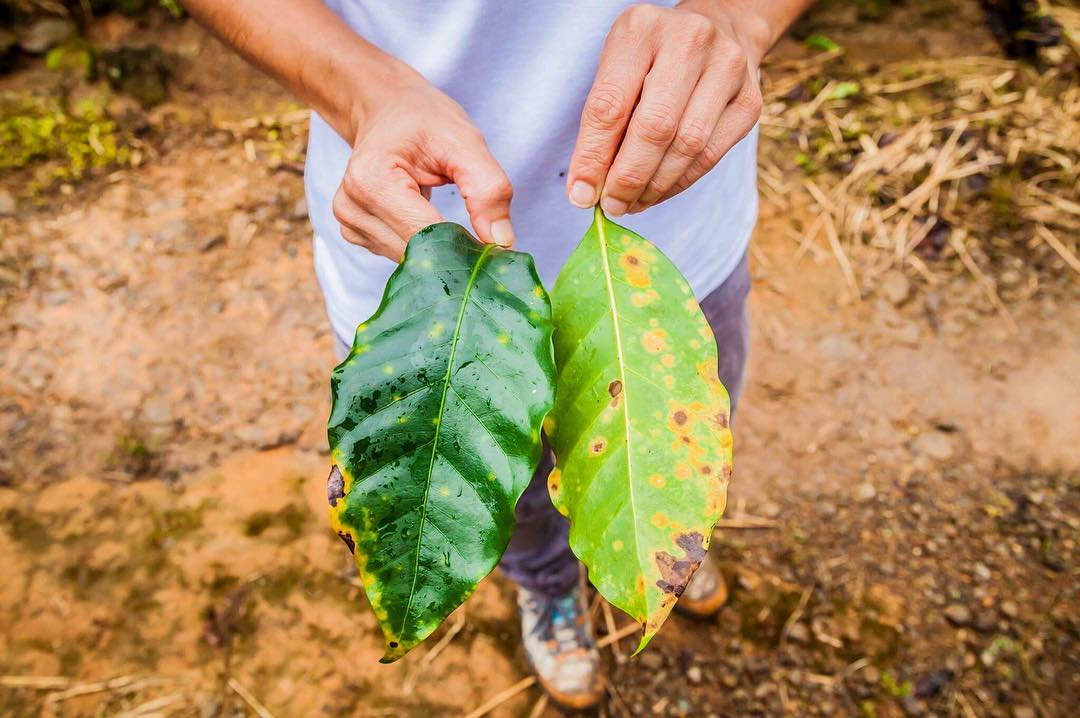

Additional Information:
https://vinepair.com/booze-news/devastating-coffee-rust-hits-central-america/

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
#Initially Reading the Code from the comma seperated variable file
data = pd.read_csv("arabica_data_cleaned.csv", sep=',')
#Copying the data for an initial study of it
part1 = data.copy()

part1.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

<h5>Initial Data</h5>

With all of the columns still in place, as shown above, it is not necessary to have these many variables.

Initially the data will look like this as a table. (Shown Below)


In [2]:
part1

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
5,6,Arabica,ji-ae ahn,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,...,Bluish-Green,1,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,7,Arabica,hugo valdivia,Peru,NaN,NaN,hvc,NaN,richmond investment-coffee department,NaN,...,Bluish-Green,0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,8,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.00,1700.00,1635.00
8,9,Arabica,ethiopia commodity exchange,Ethiopia,aolme,NaN,c.p.w.e,010/0338,NaN,1570-1700,...,NaN,0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.00,1700.00,1635.00
9,10,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,NaN,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.00,1850.00,1822.50


<h5>Chosen Variables</h5>

However, a lot of this information will not be needed in the overall analysis of it, so we will be tidying the data and only utilising the variables that are relevant. For example, we already know that every single coffee bean in our data is Arabica, thus we can eliminate that from the table so that we do not need to waste space with it. We are also adding the 10 profiles together to get the Total Cup Points since we want to have an overall value for the coffee bean that is being studied.

In [3]:
#Creating a table with the wanted variables
cleaned_table = part1[[ 'Country.of.Origin', 'Altitude', 'Region', 'Aroma', 'Flavor',\
               'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity',\
               'Clean.Cup', 'Sweetness', 'Cupper.Points','Total.Cup.Points',\
               'altitude_low_meters','altitude_high_meters', 'altitude_mean_meters']].copy()

cleaned_table['Total.Cup.Points'] = cleaned_table['Aftertaste'] + cleaned_table['Acidity'] \
    + cleaned_table['Body'] + cleaned_table['Balance'] + cleaned_table['Uniformity'] \
    + cleaned_table['Clean.Cup'] + cleaned_table['Sweetness'] + cleaned_table['Aroma'] \
    + cleaned_table['Flavor'] + cleaned_table['Cupper.Points']

cleaned_table


,Country.of.Origin,Altitude,Region,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,1950-2200,guji-hambela,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.59,1950.00,2200.00,2075.00
1,Ethiopia,1950-2200,guji-hambela,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,1950.00,2200.00,2075.00
2,Guatemala,1600 - 1800 m,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.76,1600.00,1800.00,1700.00
3,Ethiopia,1800-2200,oromia,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.01,1800.00,2200.00,2000.00
4,Ethiopia,1950-2200,guji-hambela,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,1950.00,2200.00,2075.00
5,Brazil,NaN,NaN,8.58,8.42,8.42,8.50,8.25,8.33,10.00,10.00,10.00,8.33,88.83,NaN,NaN,NaN
6,Peru,NaN,NaN,8.42,8.50,8.33,8.50,8.25,8.25,10.00,10.00,10.00,8.50,88.75,NaN,NaN,NaN
7,Ethiopia,1570-1700,oromia,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.00,9.33,9.00,88.66,1570.00,1700.00,1635.00
8,Ethiopia,1570-1700,oromiya,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.00,9.33,8.67,88.42,1570.00,1700.00,1635.00
9,Ethiopia,1795-1850,"snnp/kaffa zone,gimbowereda",8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.00,10.00,8.50,88.25,1795.00,1850.00,1822.50


<h4>After Printing the Cleaned table, the columns that are staying are</h4>

<ol>
    <li>Country.of.Origin</li>
    <li>'Altitude</li>
    <li>Region</li>
    <li>Aroma</li>
    <li>Flavor</li>
    <li>Aftertaste</li>
    <li>Acidity</li>
    <li>Body</li>
    <li>Balance</li>
    <li>Uniformity</li>
    <li>Clean.Cup</li>
    <li>Sweetness</li>
    <li>Total Cup Points</li>
    <li>Altitude Low Meters</li>
    <li>Altitude High Meters</li>
    <li>Altitude Mean Meters</li>
</ol>

To further clean the table, we are going to drop all the rows that have missing data present as they will impeded the progress of the analyzing and provide bad results

In [4]:
#Dropping the NaN values, and sorting the table by points
cleaned_table = cleaned_table.dropna()
cleaned_table = cleaned_table.sort_values(by = 'Total.Cup.Points')
cleaned_table.head(10)

,Country.of.Origin,Altitude,Region,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
1310,Honduras,1400,comayagua,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1400.00,1400.00,1400.00
1309,Guatemala,4650,nuevo oriente,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,59.84,1417.32,1417.32,1417.32
1308,Nicaragua,1100,jalapa,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,63.08,1100.00,1100.00,1100.00
1307,Haiti,~350m,"department d'artibonite , haiti",6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,350.00,350.00,350.00
1306,Mexico,900,juchique de ferrer,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,900.00,900.00,900.00
1305,Honduras,1450 msnm,marcala,7.00,6.33,6.17,6.50,6.67,6.17,8.00,8.00,8.00,6.33,69.17,1450.00,1450.00,1450.00
1304,Honduras,1450 msnm,marcala,7.00,6.17,6.17,6.67,6.50,6.17,8.00,8.00,8.00,6.50,69.18,1450.00,1450.00,1450.00
1303,Honduras,1450 msnm,marcala,6.67,6.50,6.17,6.67,6.83,6.17,8.00,8.00,8.00,6.33,69.34,1450.00,1450.00,1450.00
1301,Mexico,1000 meters,"sierra norte yajalon, chiapas",6.92,7.00,6.83,6.92,7.42,6.92,6.00,6.00,10.00,6.75,70.76,1000.00,1000.00,1000.00
1300,Mexico,1800,veracruz,6.50,6.67,6.42,7.17,7.33,6.50,8.00,6.00,10.00,6.42,71.01,1800.00,1800.00,1800.00


<h5>Data given by the Total Cup Points</h5>

By sorting the table by the Total Cup Points in ascending order, we can see that the bottom 10 regions/Country of Origins' beans reside from Central America. With Central America having the lowest gross domestic capital in the western hemispher, it can be concluded that there is not as much research and money being put into these beans as more affluent and stable countries. 

Another large point with why these areas suffering, is climate change. One farmer, Abelardo Ayala, has stated that his plantation which resided between 600 and 1000 meters was very ideal for the farming of his beans. With climate change, temperatures are increasing which are resulting in the area getting too hot for coffee to be succesfully grown. This can also be showing how other areas with higher altitudes are starting to raise in popularity due to their beans thriving. With the increase in heat, the fungi responsible for the coffee rust is growing at an alarming rate due to its environment being made more suitable to faciliate it.

Side note, this farmer and many others in the region are moving over to Cocoa beans since that is easier for them to grow due to the increasing heat.


Further information is present at this link.
shorturl.at/hnEI0
https://www.reuters.com/article/us-centralamerica-climatechange-coffee-c-idUSKCN10Z0VX

After this show of data, you can see what the table looks like sorted with the data descending from the highest values.

In [5]:
cleaned_table = cleaned_table.sort_values(by = 'Total.Cup.Points',\
                                          ascending = False  )
cleaned_table.head(10)

,Country.of.Origin,Altitude,Region,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,Ethiopia,1950-2200,guji-hambela,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.0,10.00,8.75,90.59,1950.0,2200.0,2075.0
1,Ethiopia,1950-2200,guji-hambela,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.0,10.00,8.58,89.92,1950.0,2200.0,2075.0
3,Ethiopia,1800-2200,oromia,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.0,10.00,8.67,89.01,1800.0,2200.0,2000.0
4,Ethiopia,1950-2200,guji-hambela,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.0,10.00,8.58,88.83,1950.0,2200.0,2075.0
7,Ethiopia,1570-1700,oromia,8.25,8.33,8.50,8.42,8.33,8.50,10.00,10.0,9.33,9.00,88.66,1570.0,1700.0,1635.0
8,Ethiopia,1570-1700,oromiya,8.67,8.67,8.58,8.42,8.33,8.42,9.33,10.0,9.33,8.67,88.42,1570.0,1700.0,1635.0
9,Ethiopia,1795-1850,"snnp/kaffa zone,gimbowereda",8.08,8.58,8.50,8.50,7.67,8.42,10.00,10.0,10.00,8.50,88.25,1795.0,1850.0,1822.5
10,Ethiopia,1855-1955,oromia,8.17,8.67,8.25,8.50,7.75,8.17,10.00,10.0,10.00,8.58,88.09,1855.0,1955.0,1905.0
11,United States,meters above sea level: 1.872,antioquia,8.25,8.42,8.17,8.33,8.08,8.17,10.00,10.0,10.00,8.50,87.92,1872.0,1872.0,1872.0
12,United States,meters above sea level: 1.943,antioquia,8.08,8.67,8.33,8.42,8.00,8.08,10.00,10.0,10.00,8.33,87.91,1943.0,1943.0,1943.0


Because there is such a large amount of data with 326 different regions, it will be easier to understand the plotted data using averages of the regions rather than plotting every single piece of information as shown below.

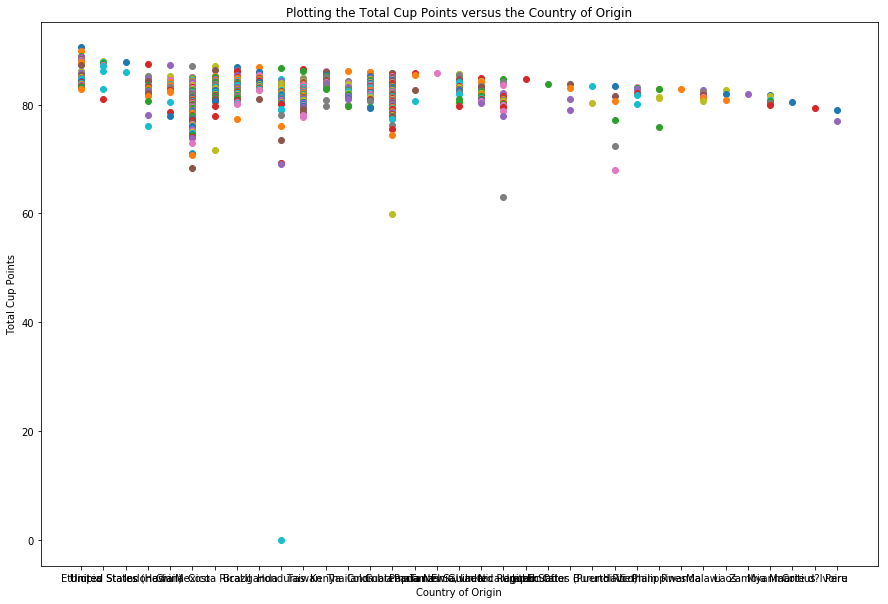

In [6]:

#Plotting the information for Country of Origin vs total cup points
plt.figure(figsize=(15,10))
plt.title("Plotting the Total Cup Points versus the Country of Origin")
plt.xlabel("Country of Origin")
plt.ylabel("Total Cup Points")

y_data = cleaned_table['Total.Cup.Points'].values
x_data = cleaned_table['Country.of.Origin'].values

for x,y in zip(x_data, y_data):
    plt.scatter(x, y)

In [14]:
meter_avg_table = cleaned_table[[ 'Country.of.Origin', 'Region', 'Total.Cup.Points', \
                                 'altitude_mean_meters', 'Flavor']].copy()
meter_avg_table['average_points'] = 0.0
#Adding these filters to get rid of the outliers that are present
meter_avg_table = meter_avg_table[meter_avg_table['altitude_mean_meters'] < 5000]
meter_avg_table = meter_avg_table[meter_avg_table['Total.Cup.Points'] > 40]

This next cell will be showing how altitude affects the beans.

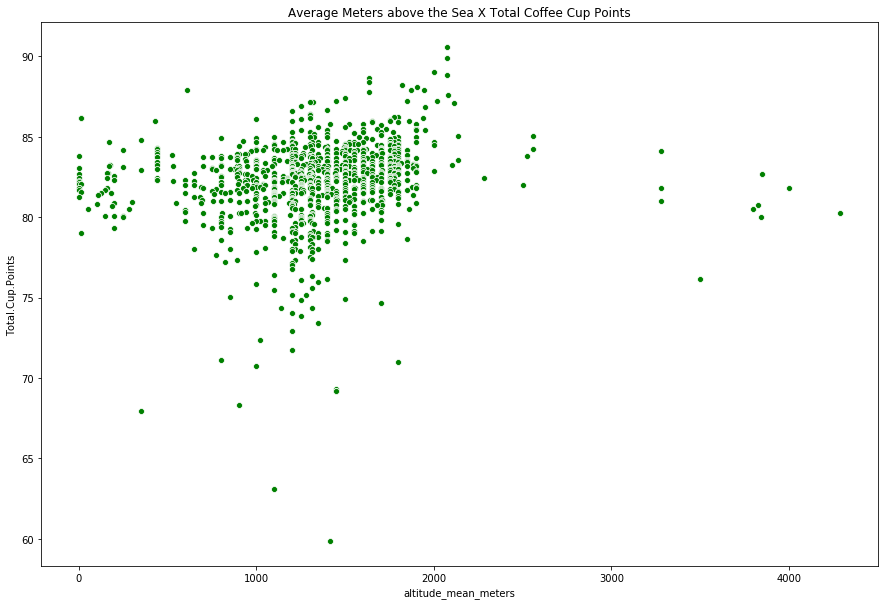

In [15]:
plt.figure(figsize=(15,10))
plt.title('Average Meters above the Sea X Total Coffee Cup Points')
part2 = sb.scatterplot(x = meter_avg_table['altitude_mean_meters'], y = meter_avg_table['Total.Cup.Points'], color = 'g')

<h5>How Altitude Affects the beans</h5>

Based on this scatter plot, it can be seen that the best ranked beans hover around the 2000 average meter mark. This meter marks specifices the altitude at which the beans are growing. 

When judging beans, one of the most important characteristics when it comes to growing beans is what altitude it is grown at. This then leading to the fact that the higher altitude a bean is grown at, the better the quality. 


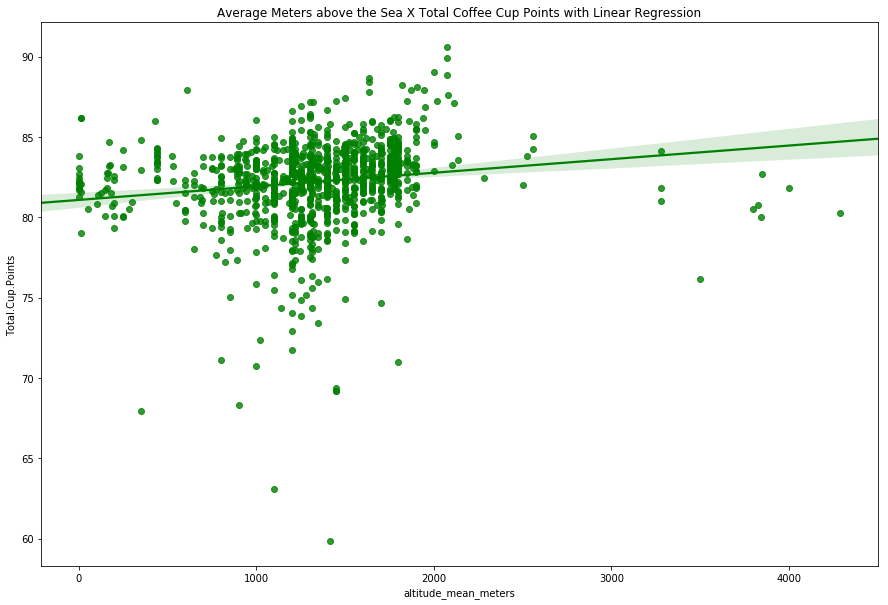

In [16]:
plt.figure(figsize=(15,10))
plt.title("Average Meters above the Sea X Total Coffee Cup Points with Linear Regression")
sb.regplot(meter_avg_table['altitude_mean_meters'],meter_avg_table['Total.Cup.Points'], fit_reg = True, color = 'g')


<h5>Linear Regression with the Mean Altitude x Total Cup Points Data</h5>

With this linear regression model, it can be seen that there is an upwards trend with altitude leading to a higher amount of total cup points. This is important as this trend can predict that when sea levels are continuing to rise, the altitude is therfore decreasing as this is the average amount of meters from the sea.

<h5>Justifying the Classifications given</h5>

Following the classifications from caffe nero and the Coffee Institute, their taste profiles for altitude are the following:
1500m+ will result in more floral and berry flavors. 1200m+ is more choclatey and citrusy as the acidity is increasing. Around 900 meters, the beans taste more nutty, and below this it is earthy. Earthy meaning that the coffee tastes more like dirt which is the worst tasting of the beans available. 

Additional information can be found at this link:
https://caffenero.com/us/the-journal/how-altitude-affects-the-taste-of-coffee/

Looking into proving that taste also gets better with altitude, instead of looking at the overall profile of the coffee, gaze at the chart below.

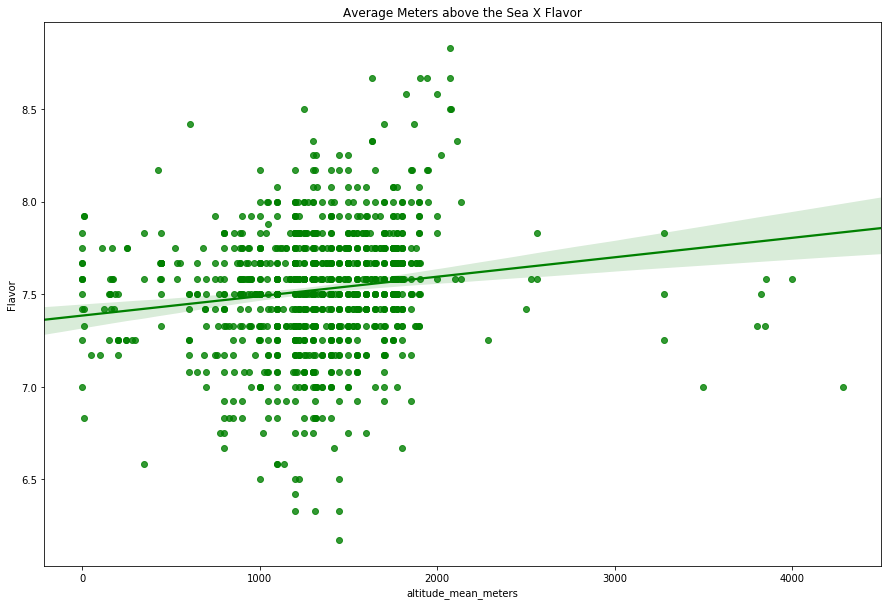

In [21]:
plt.figure(figsize=(15,10))
plt.title('Average Meters above the Sea X Flavor')
sb.regplot(meter_avg_table['altitude_mean_meters'],meter_avg_table['Flavor'], fit_reg = True, color = 'g')






<h5>How the Altitude ties in with Global Warming</h5>

With this information, it is important to take into account how global warming is resulting in an increase in sea levels. With an increase in sea levels, the height from sea level is changing along with the ecosystems of these areas that are growing coffee. 



The world will be getting modified more than ever due to the increasing sea levels. With the sea level rise rate accelerating greater than ever before, the world will not be the same for future generations. They will not experience the same world that we experienced today.

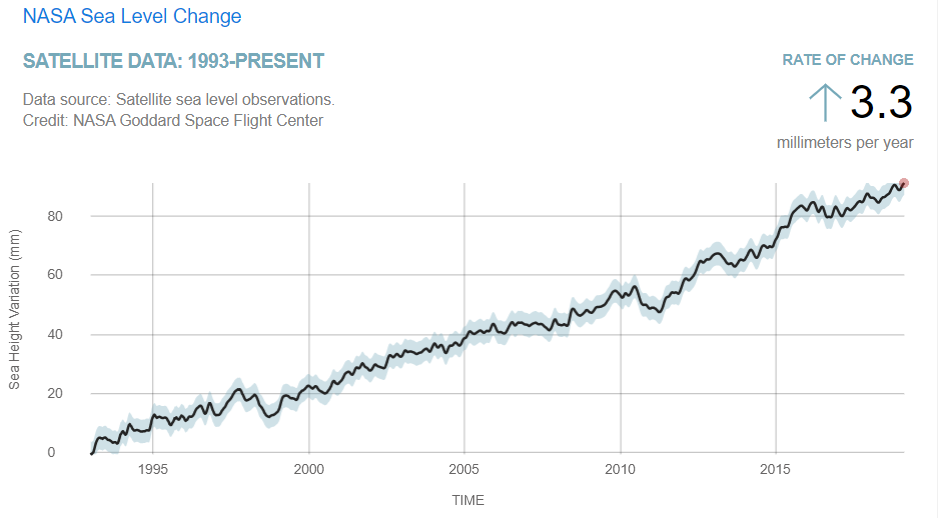

Additional Information: https://climate.nasa.gov/vital-signs/sea-level/
https://climate.nasa.gov/news/2680/new-study-finds-sea-level-rise-accelerating/

<h5>Conclusion</h5>

With a growing amount of fungus threatning to take out our crops, it is more important than ever before to start looking forward to doing something about global warming. While initiatives are finally starting to be put in place, this is one of the concequences that can be added to the growing list of issues that are present. With this issue of crop endangerment being finally populized in mainstream media (albeit noticed by a small population) due to the film Inception, more resources and manpower need to be put into finding out what to do about these invasive diseases. A good example to help people realise how they have been touched by this issue, is the modern Banana. Many individuals may remember recieving banana flavored candy in their halloweed bags (or even today, hey I'm not judging), and thinking that it tastes nothing like the banana they know. This is because these banana flavored items are actually flavored after an extinct species of banana. This species falling prey to the "panama disease", a similar issue to coffee rust that we explored in the data above. 

Coffee beans weren't the first plant to be affected by a fungal disease, and they won't be the last. I encourage you, the reader, to see that our crops aren't a forever item. And that we should not take them for granted.

Additional Reading: https://www.delish.com/food-news/a43306/bananas-extinct-fungal-disease/